> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset chosen
I chose to investigate the TMDb dataset, gatehering info on movies like revenues, budgets, popularity, year of release.

### Questions that come to my mind:
- How is budget correlated with revenue?
- How is revenue correlated with popularity?
- What is the evolution of budget (adjusted) over the years?
- What is the evolution of revenue (adjusted) over the years?
- What are the drivers for higher revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv('tmdb-movies.csv')

In [3]:
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Many null values in the columns 'homepage' and 'tagline'
# I delete these two columns
movies_df_cleaned = movies_df.drop(['homepage','tagline'], axis=1)

In [7]:
# Function to replace zero values in a dataset column
def replace_zero(df):
    return df.replace(0,np.NaN,inplace=True)

In [8]:
# Search for zero values in column 'budget'
movies_df_cleaned.query('budget == 0', inplace = False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,illustrator|sex scene|near future|infected|emo...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,chipmunk|cgi|talking animal|aftercreditsstinge...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,skyscraper|high rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [9]:
#Replace zero values by null in column 'budget'
replace_zero(movies_df_cleaned['budget'])

In [10]:
#Replace zero values by null in columns 'revenue', 'budget_adj' and 'revenue_adj'
replace_zero(movies_df_cleaned['revenue'])
replace_zero(movies_df_cleaned['budget_adj'])
replace_zero(movies_df_cleaned['revenue_adj'])

In [11]:
#Check how many null values are in each columns, to see the results of the previous steps
movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              5170 non-null float64
revenue_adj             4850 non-null float64
dtypes: float64(6), i

In [12]:
# Removal of the potential duplicates
movies_df_cleaned.drop_duplicates(inplace=True)

In [13]:
movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(6), i

In [14]:
movies_df_cleaned.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10865.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.071790,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,31.382701,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,111.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
# Final step of the cleaning process is to remove the movies with a 0mn duration ('runtime'=0)
movies_df_cleaned.query('runtime!=0',inplace=True)

In [16]:
movies_df_cleaned.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10834.000000,10834.000000,5.166000e+03,4.849000e+03,10834.000000,10834.000000,10834.000000,10834.000000,5.166000e+03,4.849000e+03
mean,65750.128854,0.647762,3.075525e+07,8.923886e+07,102.363855,217.962064,5.976343,2001.295274,3.690807e+07,1.151009e+08
std,91819.986178,1.001204,3.891025e+07,1.620801e+08,30.948225,576.370933,0.935047,12.819708,4.196569e+07,1.988557e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10586.250000,0.208536,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.103886e+06,1.046585e+07
50%,20551.000000,0.384690,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.273559e+07,4.395666e+07
75%,75055.000000,0.715448,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Investigating the budget

In [17]:
# replacement of the name movies_df_cleaned by df for easier use
df = movies_df_cleaned

Text(0,0.5,'Number of movies')

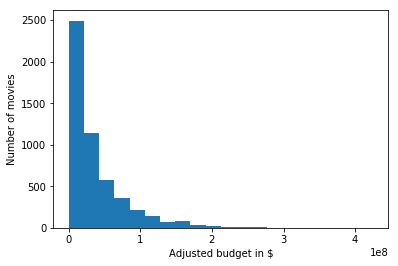

In [54]:
# First, I plot the adjusted budget distribution
plt.hist(df['budget_adj'].dropna(), bins=20)
plt.xlabel('Adjusted budget in $')
plt.ylabel('Number of movies')

Most of the movies have a budget of less than 25 m$

In [19]:
# Then we normalized the plot
# To do so, we first create a function to normalized a column
def normalize(df):
    std = df.std()
    mean = df.mean()
    distance_to_mean = df - df.mean()
    return distance_to_mean.div(std)

Text(0,0.5,'Number of movies')

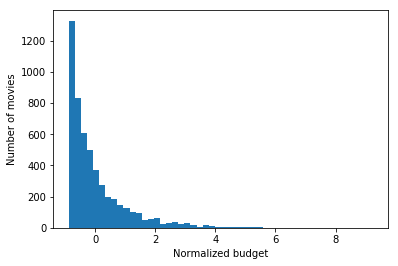

In [56]:
plt.hist(normalize(df['budget_adj']).dropna(), bins=50)
plt.xlabel('Normalized budget')
plt.ylabel('Number of movies')

In [21]:
# Another interesting thing to see is the evolution of the adjusted budget over the years
# To see this, we plot the mean of the adjusted budget per year
# To do so, we first group by release year
grouped_by_year = df.groupby('release_year')

# Then we get the mean adjusted budget per year
mean_budget_per_year = grouped_by_year['budget_adj'].mean()

Text(0,0.5,'Mean adjusted budget in $')

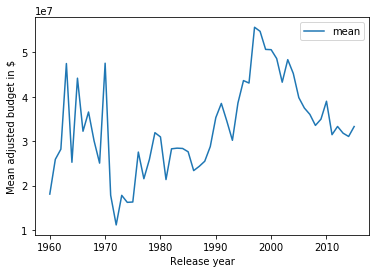

In [49]:
plt.plot(mean_budget_per_year, label='mean')
plt.legend()
plt.xlabel('Release year')
plt.ylabel('Mean adjusted budget in $')

The result is quite surprising, the mean budget is not going up as I would have expected, it is rather constant with a few peaks in the 60s and in the 2000s.
We can also plot the median and the max to have a better idea of the budget evolution

Text(0,0.5,'Adjusted budget in $')

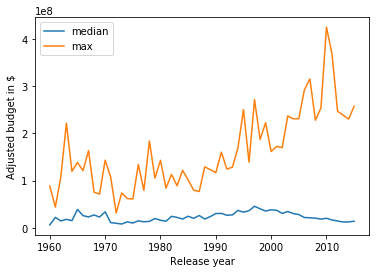

In [48]:
plt.plot(grouped_by_year['budget_adj'].median(), label='median')
plt.plot(grouped_by_year['budget_adj'].max(), label='max')
plt.legend()
plt.xlabel('Release year')
plt.ylabel('Adjusted budget in $')

This is already less surprising: the maximum budget is on an ascending trend over the years. We see a pick on the year 2010 for the maximum budget, which I would guess would be Avatar. I check this below.

In [24]:
# Look for the maximum budget of all time
df['original_title'][df['budget_adj'].argmax()]

"The Warrior's Way"

This is not what I was expecting. I will check if this is not a mistake by checking the budget of the movie

In [25]:
df['budget_adj'][df['budget_adj'].argmax()]

425000000.0

Indeed, the budget is 425m\$ which is in line with what we saw in the graph. But by looking at wikipedia we see that the budget of this movie was only 40m\$, so there must be a mistake somewhere.
Out of curiosity, I will look for Avatar in the database, which is the movie that I know has the biggest budget ever.

In [26]:
df[df['original_title']=='Avatar']

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


Avatar budget is "only" 237m\$, well below the maximum budget of 425m\$, which is probably a mistake.

<br>To end this investigation on the budget, I will assess the correlation of the adjusted budget with other variables, like revenue or popularity

In [27]:
# Definition of the correlation function
def correlation(x, y):
    std_x = x.std(ddof=0)
    mean_x = x.mean()
    std_y = y.std(ddof=0)
    mean_y = y.mean()
    standardized_x = (x - mean_x) / std_x
    standardized_y = (y - mean_y) / std_y
    correlation_array = standardized_x * standardized_y
    correlation = correlation_array.mean()
    return correlation

In [28]:
print(correlation(df['budget'], df['revenue']))
print(correlation(df['budget'], df['popularity']))
print(correlation(df['revenue'], df['vote_average']))

0.8323678004610061
0.637173439782764
0.176676750861833


The correlation of the budget is a lot higher with revenue than with popularity. This is understandeable, a higher budget means more advertisement, marketing campaigns, more famous actors and in the end more revenues. We can plot the heatmap of the budget vs revenue, to have a visual idea of the correlation.
<br>We also see that there is no correlation between the budget and the vote average. A higher budget does not mean a higher vote in our sample. 

Text(0,0.5,'Adjusted revenue in $')

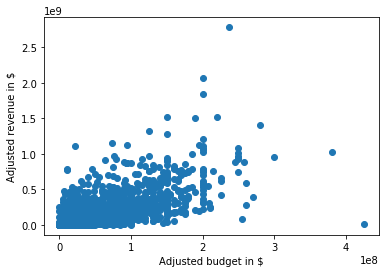

In [57]:
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('Adjusted budget in $')
plt.ylabel('Adjusted revenue in $')



### Investigating the revenue

After the budget, I will use the same approach to investigate the revenue (adjusted).

Text(0,0.5,'Number of movies')

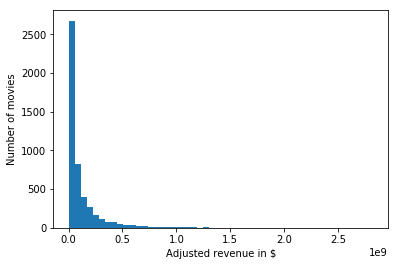

In [58]:
# First, we can plot an histogram of the revenues for the complete dataset
plt.hist(df['revenue_adj'].dropna(), bins=50)
plt.xlabel('Adjusted revenue in $')
plt.ylabel('Number of movies')

Most of the movies are in the lowest revenue bin, the distribution is negative. It is no surprise considering that it was the same for the budget: the distribution had the same shape. However, the standard deviation is higher for the revenue than for the budget.

In [31]:
# We now look at the evolution of the adjusted revenue over the years
# we can reuse the df grouped_by_year defined earlier
mean_revenue_per_year = grouped_by_year['revenue_adj'].mean()

Text(0,0.5,'Adjusted revenue in $')

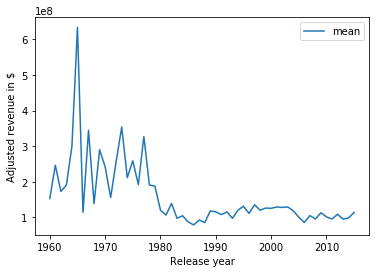

In [59]:
plt.plot(mean_revenue_per_year, label='mean')
plt.legend()
plt.xlabel('Release year')
plt.ylabel('Adjusted revenue in $')

The revenues decreased suddenly in the late 70s, and are quite flat since then. There is a big peak to be noticed in 1965. The decrease in revenue in the 70s could be the result of the greater importance of TV in people's life, meaning less time and interest in going to the theaters.

I am also interested in the evolution of the mean and max of the revenues, to see if the trend is similar thatn with the mean.

Text(0,0.5,'Adjusted revenue in $')

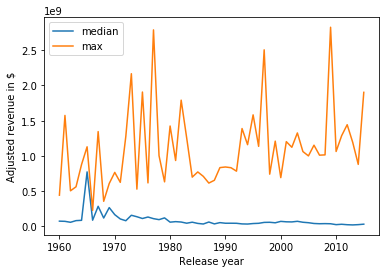

In [61]:
# here we plot the evolution of the mean and max over the years
plt.plot(grouped_by_year['revenue_adj'].median(), label='median')
plt.plot(grouped_by_year['revenue_adj'].max(), label='max')
plt.legend()
plt.xlabel('Release year')
plt.ylabel('Adjusted revenue in $')

Similarly to what I did for the budget, I would like to see which movie had the most adjusted revenue ever.

In [34]:
# Look for the maximum adjusted revenue of all time
df['original_title'][df['revenue_adj'].argmax()]

'Avatar'

As expected this time, the highest revenue ever has been generated by Avatar

To follow I look at the correlation of the revenu with the popularity

In [35]:
# I use the correlation function defined earlier
print(correlation(df['revenue'], df['popularity']))
print(correlation(df['revenue'], df['vote_average']))

0.8527352042288555
0.176676750861833


The correlation is high: for the sample of movies that we have, a higher popularity usually means a higher revenue. But this does not imply that it would be the case for all the movies in the future. Other variables can also play a role in the revenue of a movie.
<br>We also see that there is no correlation between the revenue and the vote average. A higher revenue does not mean a higher vote in our sample.

### Investigating the drivers for more revenues

In this part, I will try to find what is driving the revenue. We just saw before that the popularity is quite good correlated with the revenue, but this is something that is measured after the movie is created. I would like now to investigate the factors that we could influence before the creation of the movie. I am in particular thinking about the cast, genres, keywords and director.

Director is easier to analyse as there is only one name. For the cast and the genres, it is more difficult as the format is str|str, I need to find a way to have something exploitable. I choose to do so by counting the occurences of a given actor or genre. First, I create a function that returns a list the number of occurences for every item of a given column of a dataframe.

In [36]:
def count_values(df, column):
    # Removal of the '|' signs in the cloumn, and creation of one new colum called column_list
    df = df.assign(column_list = df[column].str.split('|'))
    # Creation of a list gathering all the cast from the column
    column_list_full = []
    for s in df['column_list']:
        # test if 's' is a list, because the function extend only works with lists
        if isinstance(s, list):
            column_list_full.extend(s)
    # creation of a Pandas datadrame out of the lists, to be able to use Pandas function value_counts
    column_list_df = pd.DataFrame(column_list_full)
    return pd.value_counts(column_list_df[0])

We can now see the top 3 actors and genres in our movie list:

In [37]:
# Top 3 actors
top_actors = count_values(df, 'cast').head(3)

In [38]:
# Top 3 genres
top_genres = count_values(df, 'genres').head(3)

In [39]:
# Top 3 keywords
top_keywords = count_values(df, 'keywords').head(3)

For the director, we don't need the function count_values. We can directly call the function value_counts

In [40]:
# Top 3 directors
top_directors = pd.value_counts(df['director']).head(3)

In [41]:
# Creation of a summary dataframe
top = pd.DataFrame({'top 3 actors': top_actors.index, 'top 3 directors': top_directors.index, 'top 3 genres': top_genres.index, 'top 3 keywords': top_keywords.index})

In [42]:
top

,top 3 actors,top 3 directors,top 3 genres,top 3 keywords
0,Robert De Niro,Woody Allen,Drama,woman director
1,Samuel L. Jackson,Clint Eastwood,Comedy,independent film
2,Bruce Willis,Steven Spielberg,Thriller,based on novel


In a second step, we want to make the same analysis, but focusing on the highest revenue movies. To do so, we will create a new column in the df dataset clustering the movies by adjusted revenue: 'low' revenue for the lowest 10%, 'high' for the top 10% and medium for the rest.

In [43]:
df_clustered_by_revenue = df.assign(revenue_level = pd.qcut(df['vote_average'], [0, 0.1, 0.9, 1], labels=['low', 'medium', 'high']))

Using this enriched dataset, we will now filter it for high revenue and look again at the top 3 actors, genres and directors

In [44]:
# Creation of a dataset containing only the movies with high adjusted revenues
df_top_revenues = df_clustered_by_revenue.query('revenue_level == "high"')
# Top 3 actors for high revenue movies
top_actors_high_revenues = count_values(df_top_revenues, 'cast').head(3)
# Top 3 directors for high revenue movies
top_directors_high_revenues = pd.value_counts(df_top_revenues['director']).head(3)
# Top 3 genres for high revenue movies
top_genres_high_revenues = count_values(df_top_revenues, 'genres').head(3)
# Top 3 genres for high revenue movies
top_keywords_high_revenues = count_values(df_top_revenues, 'keywords').head(3)
# Creation of a summary dataframe
top_for_high_revenues = pd.DataFrame({'top 3 actors': top_actors_high_revenues.index, 'top 3 directors': top_directors_high_revenues.index, 'top 3 genres': top_genres_high_revenues.index, 'top 3 keywords': top_keywords_high_revenues.index})

In [45]:
top_for_high_revenues

,top 3 actors,top 3 directors,top 3 genres,top 3 keywords
0,Robert De Niro,Martin Scorsese,Drama,woman director
1,Tom Hanks,Steven Spielberg,Comedy,based on novel
2,Leonardo DiCaprio,Quentin Tarantino,Documentary,biography


There are some differences between the top 3 for all movies of the database and the top 3 for the high revenues. Samuel L. Jackson and Bruce Willis disappear from the top3, which means that they participated in many movies that didn't generate top revenues. On the other side, Tom Hanks and Leonardo DiCaprio are not at the top overall, but have participated to more high revenue movies. Robert Di Niro is first in both categories.
<br>For the genres, thrillers are in the top 3 overall, but not for the high revenues. That means that Thriller movies somehow under-performed compared to the rest. The top 2 (Drame, Comedy) is unchanged in both categories.
<br>For the director, Martin Scorsese over-performs because it tops the high revenue category but is only 3rd overall. Woody Allen and Clint Eastwood are not even part of the top 3 for the high revenue movies, they under-perform.
<br>For the keywords, 'independent film' is not part of the high revenue movies. This is no surprise as this kind of movies are usually not displayed in many theaters and are not made to generate high revenues.

We follow the same method to look at the low revenue movies

In [46]:
# Creation of a dataset containing only the movies with high adjusted revenues
df_low_revenues = df_clustered_by_revenue.query('revenue_level == "low"')
# Top 3 actors for high revenue movies
top_actors_low_revenues = count_values(df_low_revenues, 'cast').head(3)
# Top 3 directors for high revenue movies
top_directors_low_revenues = pd.value_counts(df_low_revenues['director']).head(3)
# Top 3 genres for high revenue movies
top_genres_low_revenues = count_values(df_low_revenues, 'genres').head(3)
# Top 3 keywords for high revenue movies
top_keywords_low_revenues = count_values(df_low_revenues, 'keywords').head(3)
# Creation of a summary dataframe
top_for_low_revenues = pd.DataFrame({'top 3 actors': top_actors_low_revenues.index, 'top 3 directors': top_directors_low_revenues.index, 'top 3 genres': top_genres_low_revenues.index, 'top 3 keywords': top_keywords_low_revenues.index})

In [47]:
top_for_low_revenues

,top 3 actors,top 3 directors,top 3 genres,top 3 keywords
0,Steven Seagal,Uwe Boll,Horror,sex
1,Jean-Claude Van Damme,Jason Friedberg|Aaron Seltzer,Thriller,woman director
2,Danny Trejo,Nick Lyon,Comedy,independent film


Steven Seagal and Jean-Claude Van Damme are well known for having participated to many low-quality action movies, it is not a surprise to see them in this top. Interestingly, the genres comedy appears in all the ranking we have seen: low revenue movies, high revenue movies and overall. Drama at the opposite does not appear in the top 3 for low revenu movies, which means that there are few Drama Movies that generate low revenues. 

<a id='conclusions'></a>
## Conclusions
As a conclusion, here are the steps that I followed for this analysis:
-  I started by uploading and habing a look at the data, to get a felling of what was part of the dataset.
-  I then cleaned a bit the dataset, by removing the unnecessary columns 'homepage' and 'tagline'. I also removed the movies with a budget of 0 dollars, and replaced the zero values by null values in the 'budget' and 'revenues' column, to not interfere with the statistical analysis.
- I was then ready to analyse the dataset in more details. I chose to focus on the adjusted budget and the adjusted revenue, and performed the analysis in three steps:
    1. I first focused on the budget. I discovered that the mean of adjusted budget per year is erratic over the years but overall quite constant, as well as the mean. However, the maximum budget tend to increase over the years. There is a correlation between budget and revenue from our sample, a higher budget being correlated with higher revenues. However, a higher budget is not correlated with a higher popularity neither with a higher average of vote. a higher budget does not apparently meant a higher quality movie, which is something we often experienced watching a blockbuster.
    2. I then focused on the adjusted revenue. The average revenues decreased dramatically in the 70s, which correspond more or less to the spread of TV devices in households. However, the maximum revenues did not decrease over the years, and reached its top with Avatar in 2010. I also discovered a correlation between revenues and popularity, something quite intuitive.
    3. In a third step, I explored the drivers for higher revenues: actors, director, keywords and genres.
